In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd

pd.set_option("display.max_rows", 80)
pd.set_option("display.max_columns", None)

### import target data

In [2]:
target_raw = pd.read_csv('/Users/trevorban/Desktop/zri-data/complete/target.csv').drop(columns='Unnamed: 0')
target = target_raw.copy()

In [3]:
target

zip_code               City State        Time  zori_ssa  zori_ssa_diff
0         77494            Houston    TX  2014-01-01    1390.0            NaN
1         77449            Houston    TX  2014-01-01    1202.0            NaN
2         77084            Houston    TX  2014-01-01    1058.0            NaN
3         79936            El Paso    TX  2014-01-01     887.0            NaN
4         78130        San Antonio    TX  2014-01-01    1118.0            NaN
...         ...                ...   ...         ...       ...            ...
19560     76118  Dallas-Fort Worth    TX  2021-07-01    1737.0          197.0
19561     76247  Dallas-Fort Worth    TX  2021-07-01    1937.0          146.0
19562     78756             Austin    TX  2021-07-01    1547.0          -28.0
19563     78721             Austin    TX  2021-07-01    1807.0          345.0
19564     78252        San Antonio    TX  2021-07-01    1585.0           18.0

[19565 rows x 6 columns]

In [4]:
target['Time'] = pd.to_datetime(target['Time'])

### import census data

In [5]:
# df = pd.read_csv('/Users/trevorban/Desktop/zri-data/complete/acs_master11to18_clean.csv').drop(columns='Unnamed: 0')
# df.zip_code = df.zip_code.astype(int)

In [6]:
df = pd.read_csv('/Users/trevorban/Desktop/zri-data/complete/acs_clean.csv').drop(columns='Unnamed: 0')
df.zip_code = df.zip_code.astype(int)

### import shp files

In [7]:
# import US zip codes
# https://data.houstontx.gov/dataset/zip-codes-in-the-region/resource/bb634e26-cb64-44e4-8b86-3a37d113886b

zips = gpd.read_file('/Users/trevorban/Downloads/tl_2019_us_zcta510/tl_2019_us_zcta510.shp')

In [8]:
zips['GEOID10'] = zips['GEOID10'].astype(int)
zips = zips.rename(columns={'GEOID10': 'zip_code'})

### import target zipcodes

In [9]:
# read my file of target zipcodes

city_zip = pd.read_csv('/Users/trevorban/Desktop/zri-data/complete/city_zip.csv').drop(columns='Unnamed: 0')
city_zip.head()

metro    zip
0  austin  78727
1  austin  78759
2  austin  78681
3  austin  78728
4  austin  78634

### Get geometry for city_zips from zips

In [10]:
zip_5 = zips[zips['zip_code'].isin(city_zip['zip'])]

In [11]:
# create lists of each city's zip codes
houston_zip = list(city_zip[city_zip['metro']=='houston']['zip'])
dfw_zip = list(city_zip[city_zip['metro']=='dfw']['zip'])
austin_zip = list(city_zip[city_zip['metro']=='austin']['zip'])
san_antonio_zip = list(city_zip[city_zip['metro']=='san_antonio']['zip'])
el_paso_zip = list(city_zip[city_zip['metro']=='el_paso']['zip'])

# Divide our zip_5 into each individual city
map_zip_houston = zip_5[zip_5['zip_code'].isin(houston_zip)]
map_zip_dfw = zip_5[zip_5['zip_code'].isin(dfw_zip)]
map_zip_austin = zip_5[zip_5['zip_code'].isin(austin_zip)]
map_zip_san_antonio = zip_5[zip_5['zip_code'].isin(san_antonio_zip)]
map_zip_el_paso = zip_5[zip_5['zip_code'].isin(el_paso_zip)]

### census data cleaning/feature engineering

In [12]:
df.shape

(20544, 39)

In [14]:
# try dropping columms with nulls, though they seem very important
# test = df.dropna(axis=1)

In [15]:
# test

In [16]:
df.Time[0]

'2011-01-01'

In [17]:
df['Time'] = pd.to_datetime(df['Time'])

In [18]:
df['total_pop'] = df.male_pop + df.female_pop

In [19]:
df.columns

Index(['zip_code', 'male_pop', 'female_pop', 'median_age', 'white_pop',
       'not_us_citizen_pop', 'black_pop', 'asian_pop', 'hispanic_pop',
       'amerindian_pop', 'other_race_pop', 'median_income',
       'income_per_capita', 'pop_determined_poverty_status', 'poverty',
       'gini_index', 'housing_units',
       'renter_occupied_housing_units_paying_cash_median_gross_rent',
       'occupied_housing_units', 'vacant_housing_units_for_rent',
       'median_year_structure_built', 'married_households',
       'households_public_asst_or_food_stamps', 'male_male_households',
       'female_female_households', 'children', 'median_rent',
       'percent_income_spent_on_rent', 'owner_occupied_housing_units',
       'aggregate_travel_time_to_work', 'commuters_by_public_transportation',
       'high_school_diploma', 'bachelors_degree', 'employed_pop',
       'unemployed_pop', 'pop_in_labor_force', 'armed_forces', 'year', 'Time',
       'total_pop'],
      dtype='object')

In [20]:
df['male_pop_ratio'] = df.male_pop/df.total_pop
df['female_pop_ratio'] = df.female_pop/df.total_pop
df['white_pop_ratio'] = df.white_pop/df.total_pop
df['not_us_citizen_pop_ratio'] = df.not_us_citizen_pop/df.total_pop
df['black_pop_ratio'] = df.black_pop/df.total_pop
df['asian_pop_ratio'] = df.asian_pop/df.total_pop
df['hispanic_pop_ratio'] = df.hispanic_pop/df.total_pop
df['amerindian_pop_ratio'] = df.amerindian_pop/df.total_pop
df['other_race_pop_ratio'] = df.other_race_pop/df.total_pop
df['pop_determined_poverty_status_ratio'] = df.pop_determined_poverty_status/df.total_pop
df['children_ratio'] = df.children/df.total_pop
df['employed_pop_ratio'] = df.employed_pop/df.total_pop
df['unemployed_pop_ratio'] = df.unemployed_pop/df.total_pop
df['pop_in_labor_force_ratio'] = df.pop_in_labor_force/df.total_pop
df['armed_forces_ratio'] = df.armed_forces/df.total_pop

In [21]:
df.columns

Index(['zip_code', 'male_pop', 'female_pop', 'median_age', 'white_pop',
       'not_us_citizen_pop', 'black_pop', 'asian_pop', 'hispanic_pop',
       'amerindian_pop', 'other_race_pop', 'median_income',
       'income_per_capita', 'pop_determined_poverty_status', 'poverty',
       'gini_index', 'housing_units',
       'renter_occupied_housing_units_paying_cash_median_gross_rent',
       'occupied_housing_units', 'vacant_housing_units_for_rent',
       'median_year_structure_built', 'married_households',
       'households_public_asst_or_food_stamps', 'male_male_households',
       'female_female_households', 'children', 'median_rent',
       'percent_income_spent_on_rent', 'owner_occupied_housing_units',
       'aggregate_travel_time_to_work', 'commuters_by_public_transportation',
       'high_school_diploma', 'bachelors_degree', 'employed_pop',
       'unemployed_pop', 'pop_in_labor_force', 'armed_forces', 'year', 'Time',
       'total_pop', 'male_pop_ratio', 'female_pop_ratio', 'whit

In [22]:
b = set(df.zip_code.unique())
len(df.zip_code.unique())

214

In [23]:
a = set(target.zip_code.unique())
len(target.zip_code.unique())

215

In [24]:
print('the culprit is ... ' + str(a.difference(b)))

the culprit is ... {75033}


In [25]:
df

zip_code  male_pop  female_pop  median_age  white_pop  \
0         77494   27525.0     28283.0        33.9    36390.0   
1         77494   27525.0     28283.0        33.9    36390.0   
2         77494   27525.0     28283.0        33.9    36390.0   
3         77494   27525.0     28283.0        33.9    36390.0   
4         77494   27525.0     28283.0        33.9    36390.0   
...         ...       ...         ...         ...        ...   
20539     79912   39086.0     41178.0        34.0    17942.0   
20540     79912   39086.0     41178.0        34.0    17942.0   
20541     79912   39086.0     41178.0        34.0    17942.0   
20542     79912   39086.0     41178.0        34.0    17942.0   
20543     79912   39086.0     41178.0        34.0    17942.0   

       not_us_citizen_pop  black_pop  asian_pop  hispanic_pop  amerindian_pop  \
0                  6630.0     3717.0     6882.0        7852.0            22.0   
1                  6630.0     3717.0     6882.0        7852.0            22.0   
2                  6630.0     3717.0     6882.0        7852.0            22.0   
3                  6630.0     3717.0     6882.0        7852.0            22.0   
4                  6630.0     3717.0     6882.0        7852.0            22.0   
...                   ...        ...        ...           ...             ...   
20539             11075.0     1456.0     2555.0       56560.0           236.0   
20540             11075.0     1456.0     2555.0       56560.0           236.0   
20541             11075.0     1456.0     2555.0       56560.0           236.0   
20542             11075.0     1456.0     2555.0       56560.0           236.0   
20543             11075.0     1456.0     2555.0       56560.0           236.0   

       other_race_pop  median_income  income_per_capita  \
0                52.0       120111.0            42344.0   
1                52.0       120111.0            42344.0   
2                52.0       120111.0            42344.0   
3                52.0       120111.0            42344.0   
4                52.0       120111.0            42344.0   
...               ...            ...                ...   
20539           130.0        58979.0            31249.0   
20540           130.0        58979.0            31249.0   
20541           130.0        58979.0            31249.0   
20542           130.0        58979.0            31249.0   
20543           130.0        58979.0            31249.0   

       pop_determined_poverty_status  poverty  gini_index  housing_units  \
0                            55713.0   1421.0      0.3568        18581.0   
1                            55713.0   1421.0      0.3568        18581.0   
2                            55713.0   1421.0      0.3568        18581.0   
3                            55713.0   1421.0      0.3568        18581.0   
4                            55713.0   1421.0      0.3568        18581.0   
...                              ...      ...         ...            ...   
20539                        79958.0  12689.0      0.4810        32077.0   
20540                        79958.0  12689.0      0.4810        32077.0   
20541                        79958.0  12689.0      0.4810        32077.0   
20542                        79958.0  12689.0      0.4810        32077.0   
20543                        79958.0  12689.0      0.4810        32077.0   

       renter_occupied_housing_units_paying_cash_median_gross_rent  \
0                                                 1207.0             
1                                                 1207.0             
2                                                 1207.0             
3                                                 1207.0             
4                                                 1207.0             
...                                                  ...             
20539                                              898.0             
20540                                              898.0             
20541        

In [26]:
target = target[target['zip_code'] != 75033]

In [27]:
print(df.shape)
print(target.shape)

(20544, 55)
(19474, 6)


In [28]:
df.Time.unique()

array(['2011-01-01T00:00:00.000000000', '2011-02-01T00:00:00.000000000',
       '2011-03-01T00:00:00.000000000', '2011-04-01T00:00:00.000000000',
       '2011-05-01T00:00:00.000000000', '2011-06-01T00:00:00.000000000',
       '2011-07-01T00:00:00.000000000', '2011-08-01T00:00:00.000000000',
       '2011-09-01T00:00:00.000000000', '2011-10-01T00:00:00.000000000',
       '2011-11-01T00:00:00.000000000', '2011-12-01T00:00:00.000000000',
       '2012-01-01T00:00:00.000000000', '2012-02-01T00:00:00.000000000',
       '2012-03-01T00:00:00.000000000', '2012-04-01T00:00:00.000000000',
       '2012-05-01T00:00:00.000000000', '2012-06-01T00:00:00.000000000',
       '2012-07-01T00:00:00.000000000', '2012-08-01T00:00:00.000000000',
       '2012-09-01T00:00:00.000000000', '2012-10-01T00:00:00.000000000',
       '2012-11-01T00:00:00.000000000', '2012-12-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', '2013-02-01T00:00:00.000000000',
       '2013-03-01T00:00:00.000000000', '2013-04-01

In [29]:
target.Time.unique()

array(['2014-01-01T00:00:00.000000000', '2014-02-01T00:00:00.000000000',
       '2014-03-01T00:00:00.000000000', '2014-04-01T00:00:00.000000000',
       '2014-05-01T00:00:00.000000000', '2014-06-01T00:00:00.000000000',
       '2014-07-01T00:00:00.000000000', '2014-08-01T00:00:00.000000000',
       '2014-09-01T00:00:00.000000000', '2014-10-01T00:00:00.000000000',
       '2014-11-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000',
       '2015-01-01T00:00:00.000000000', '2015-02-01T00:00:00.000000000',
       '2015-03-01T00:00:00.000000000', '2015-04-01T00:00:00.000000000',
       '2015-05-01T00:00:00.000000000', '2015-06-01T00:00:00.000000000',
       '2015-07-01T00:00:00.000000000', '2015-08-01T00:00:00.000000000',
       '2015-09-01T00:00:00.000000000', '2015-10-01T00:00:00.000000000',
       '2015-11-01T00:00:00.000000000', '2015-12-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000', '2016-02-01T00:00:00.000000000',
       '2016-03-01T00:00:00.000000000', '2016-04-01

In [30]:
df = target.merge(df, how='inner', on=['zip_code', 'Time'])
df

zip_code               City State       Time  zori_ssa  zori_ssa_diff  \
0         77494            Houston    TX 2014-01-01    1390.0            NaN   
1         77449            Houston    TX 2014-01-01    1202.0            NaN   
2         77084            Houston    TX 2014-01-01    1058.0            NaN   
3         79936            El Paso    TX 2014-01-01     887.0            NaN   
4         78130        San Antonio    TX 2014-01-01    1118.0            NaN   
...         ...                ...   ...        ...       ...            ...   
12835     76118  Dallas-Fort Worth    TX 2018-12-01    1559.0          121.0   
12836     76247  Dallas-Fort Worth    TX 2018-12-01    1599.0          129.0   
12837     78756             Austin    TX 2018-12-01    1441.0           15.0   
12838     78721             Austin    TX 2018-12-01    1474.0          139.0   
12839     78252        San Antonio    TX 2018-12-01    1427.0           76.0   

       male_pop  female_pop  median_age  white_pop  not_us_citizen_pop  \
0       39636.0     39481.0        34.7    48223.0             10678.0   
1       48558.0     50892.0        30.4    27943.0             16284.0   
2       50141.0     51347.0        32.4    31433.0             17167.0   
3       55667.0     57784.0        31.7    12827.0             12493.0   
4       29921.0     32366.0        34.4    36140.0              3466.0   
...         ...         ...         ...        ...                 ...   
12835    7367.0      8933.0        34.6     8726.0              1556.0   
12836    6852.0      7408.0        37.7    11031.0               612.0   
12837    4114.0      4209.0        35.6     6284.0               285.0   
12838    5902.0      6590.0        34.6     2981.0              1453.0   
12839    7393.0      4760.0        29.9     2473.0               833.0   

       black_pop  asian_pop  hispanic_pop  amerindian_pop  other_race_pop  \
0         5343.0    10967.0       12793.0           130.0            87.0   
1        17642.0     4923.0       46793.0            76.0           163.0   
2        16086.0     9403.0       43152.0            68.0             0.0   
3         1674.0     1088.0       96734.0           263.0           358.0   
4         1384.0      289.0       23745.0            86.0            31.0   
...          ...        ...           ...             ...             ...   
12835     1247.0     1250.0        4094.0            86.0            24.0   
12836      429.0       35.0        2271.0            92.0             3.0   
12837      169.0      414.0        1185.0             0.0             0.0   
12838     3078.0      224.0        5999.0            16.0             6.0   
12839      576.0      109.0        8687.0            77.0            10.0   

       median_income  income_per_capita  pop_determined_poverty_status  \
0           131694.0            47019.0                        78794.0   
1            66550.0            22716.0                        99259.0   
2            64652.0            26383.0                       101270.0   
3            52088.0            21493.0                       112659.0   
4            55360.0            24671.0                        61275.0   
...              ...                ...                            ...   
12835        71439.0            31916.0                        16083.0   
12836        90848.0            32532.0                        14043.0   
12837        82705.0            59679.0                         8247.0   
12838        44076.0            22792.0                        12418.0   
12839        58474.0            17227.0                         9973.0   

       poverty  gini_index  housing_units  \
0       1899.0      0.3545        25638.0   
1      12996.0      0.3614        30224.0   
2      12417.0      0.3962        34487.0   
3      15908.0      0.4217        36497.0   
4       7293.0      0.3928        24262.0   
...        ...         ...            ...   
12835   1393.0      0.4073  

In [31]:
df.Time

0       2014-01-01
1       2014-01-01
2       2014-01-01
3       2014-01-01
4       2014-01-01
           ...    
12835   2018-12-01
12836   2018-12-01
12837   2018-12-01
12838   2018-12-01
12839   2018-12-01
Name: Time, Length: 12840, dtype: datetime64[ns]

In [32]:
df.loc[:,'zori_ssa_shift_back_1'] = df.loc[:,'zori_ssa'].shift(-1)

/Users/trevorban/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


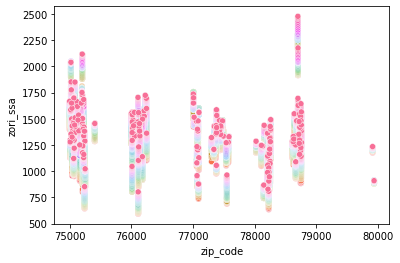

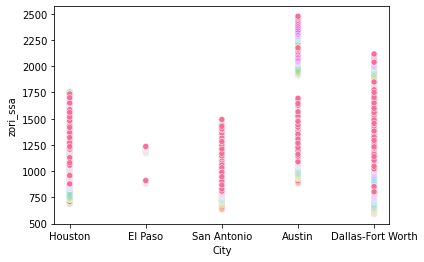

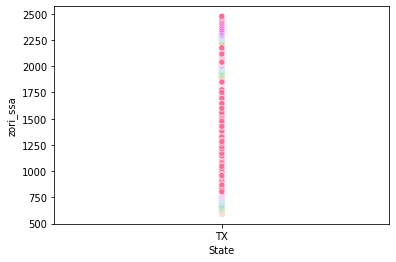

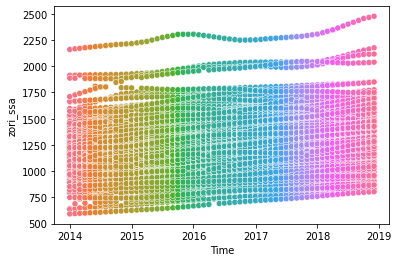

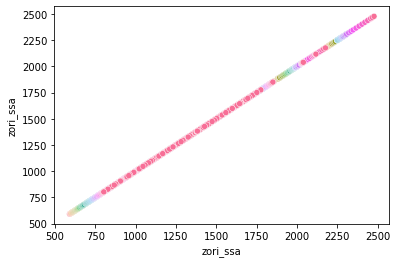

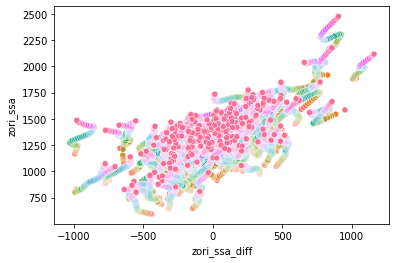

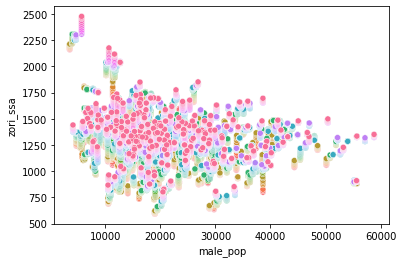

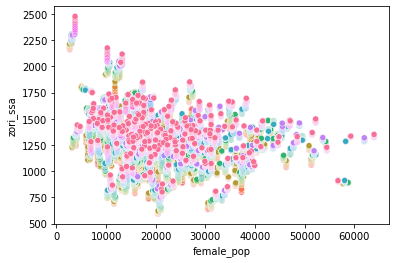

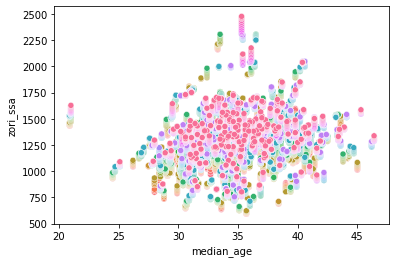

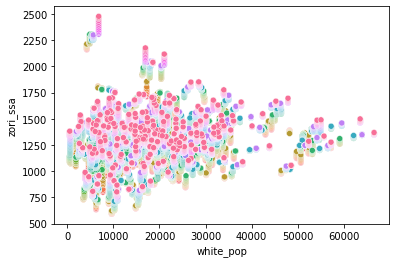

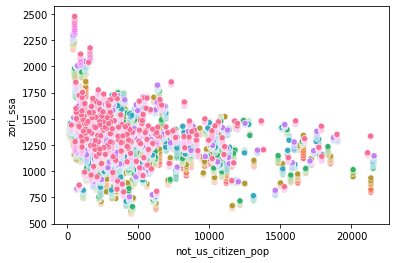

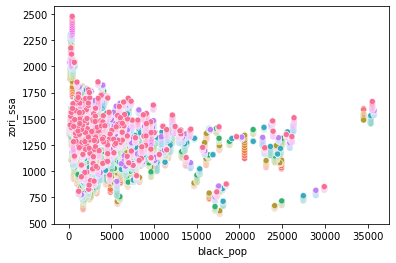

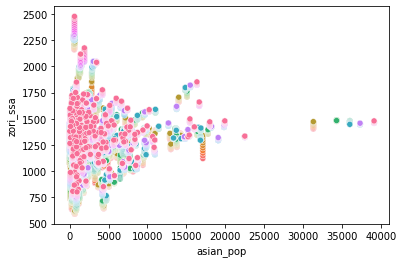

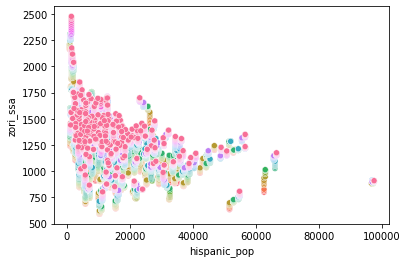

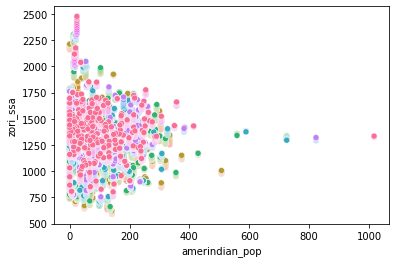

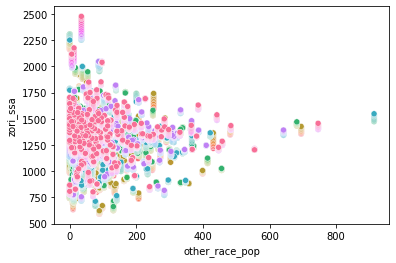

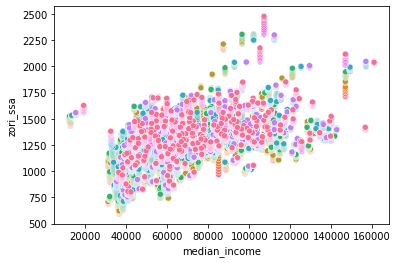

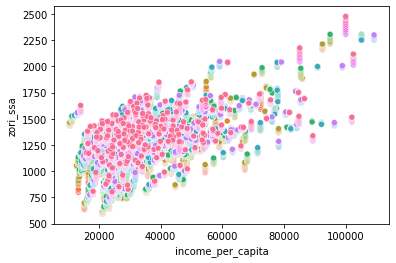

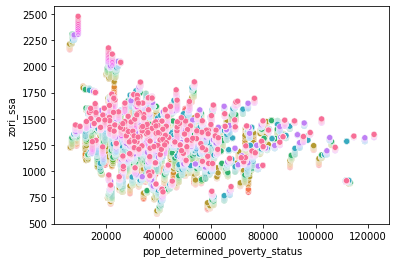

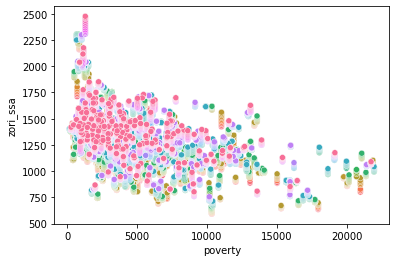

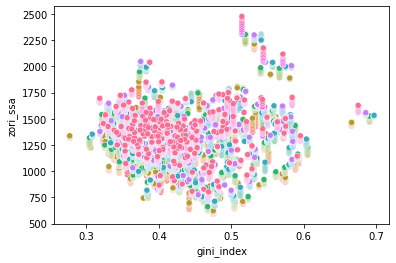

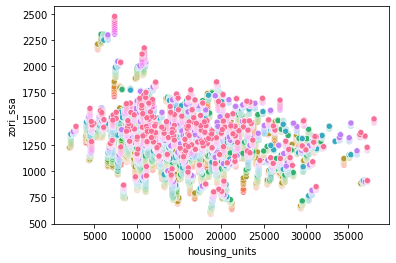

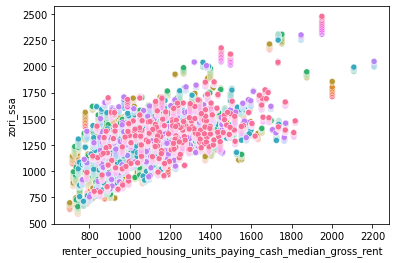

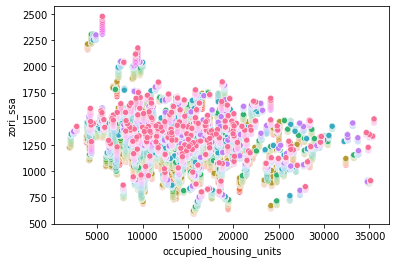

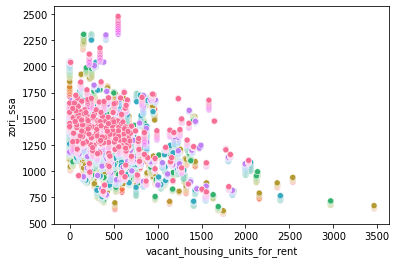

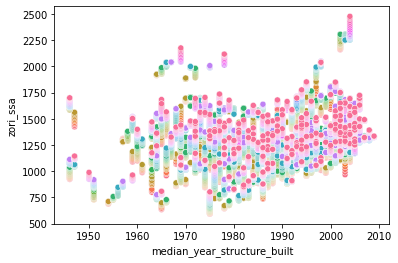

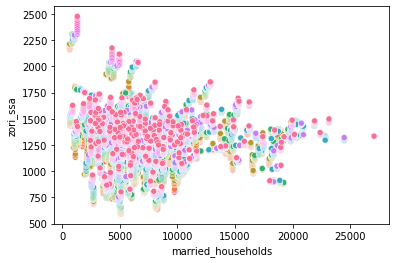

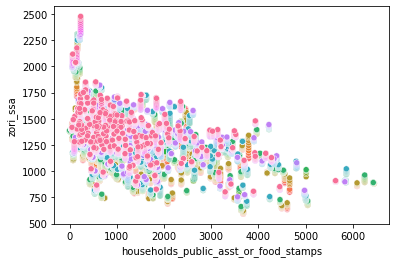

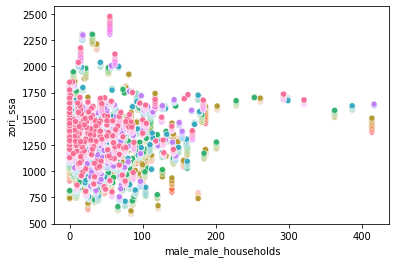

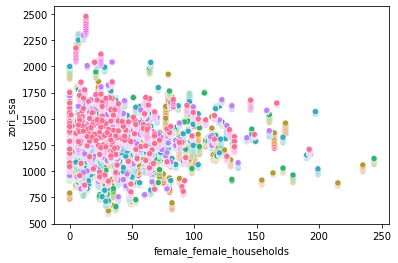

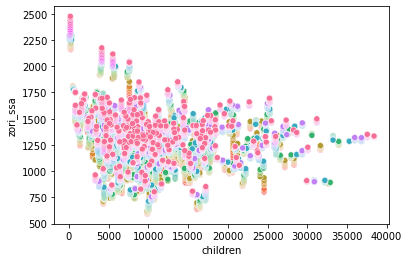

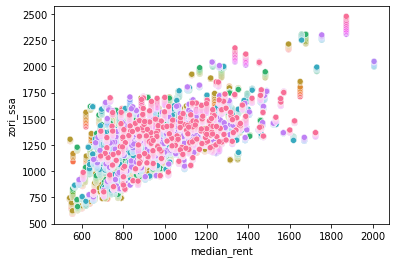

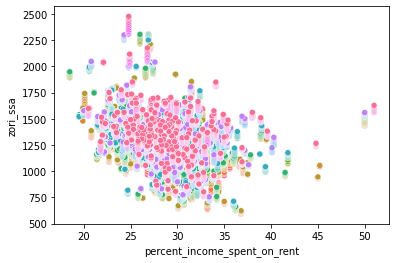

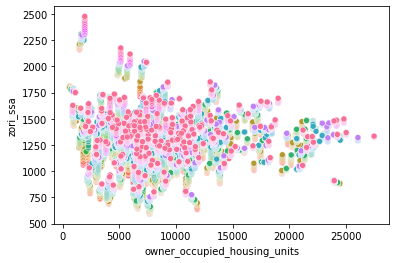

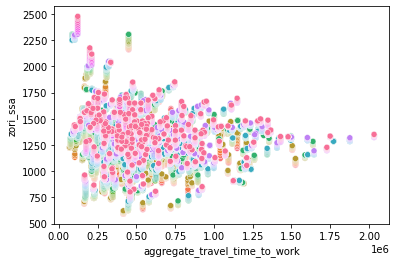

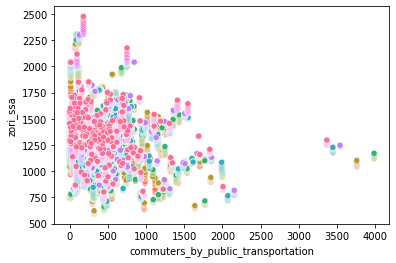

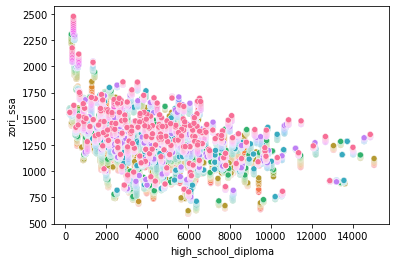

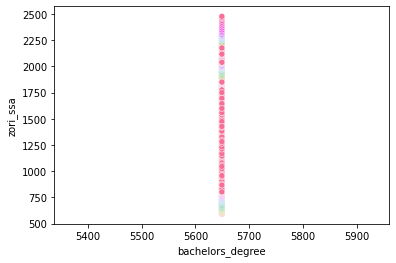

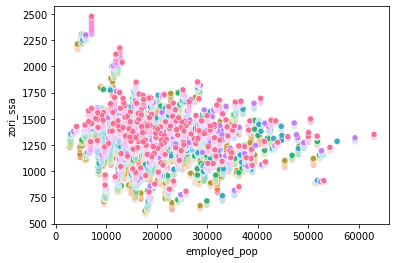

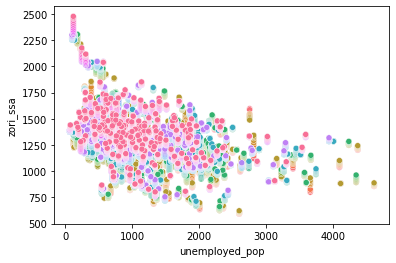

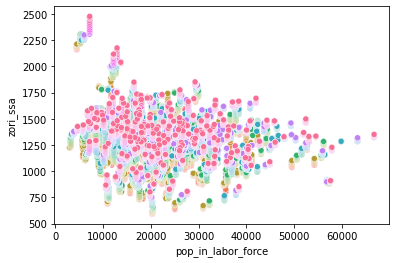

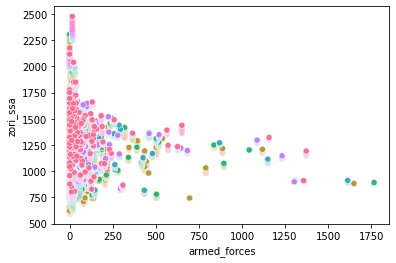

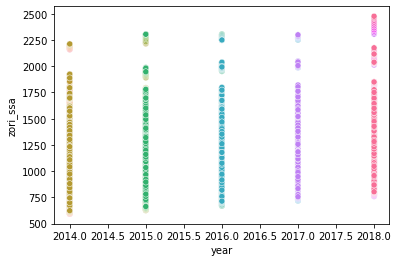

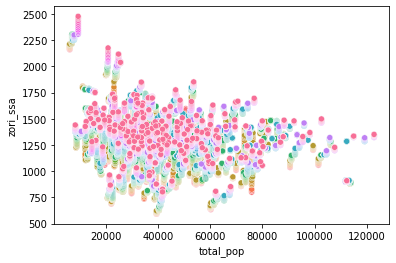

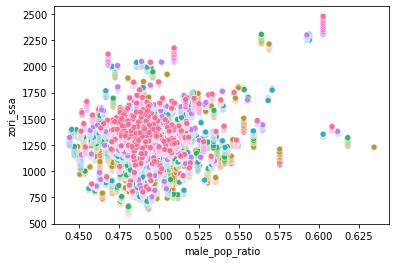

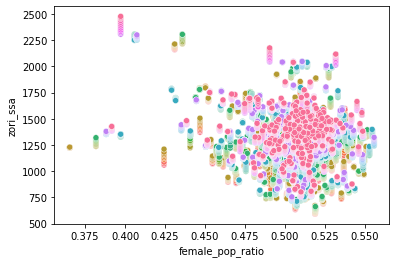

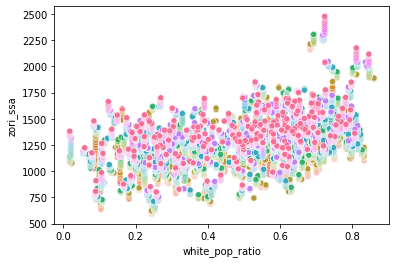

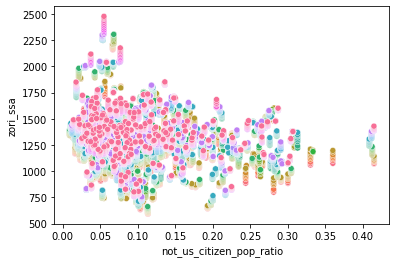

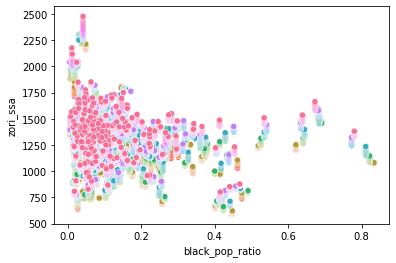

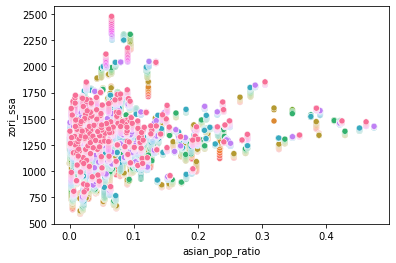

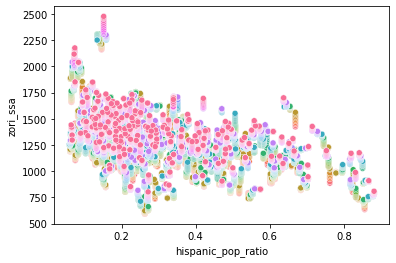

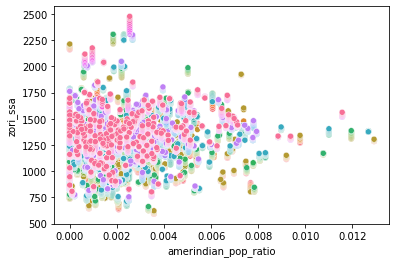

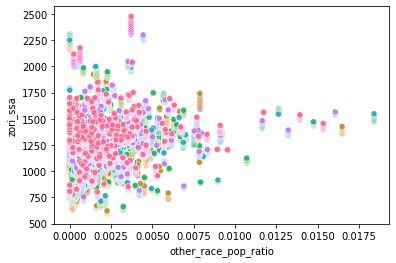

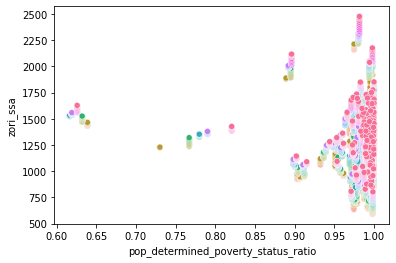

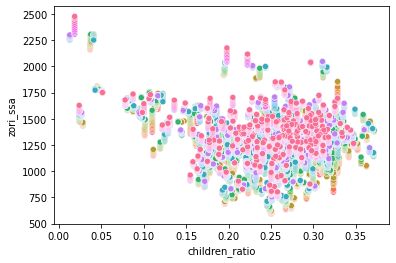

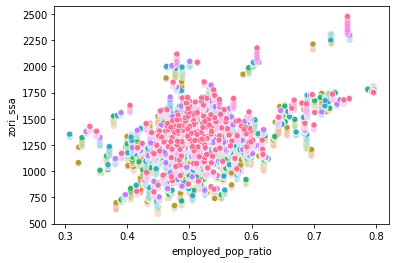

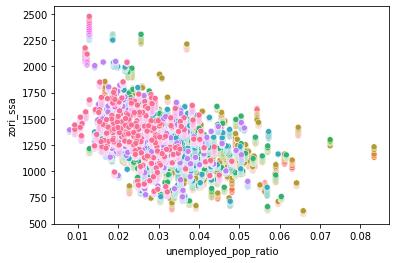

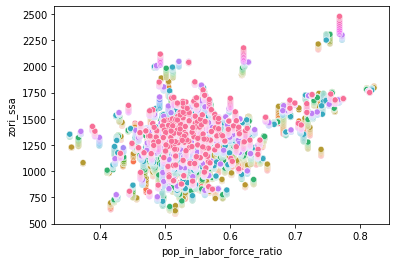

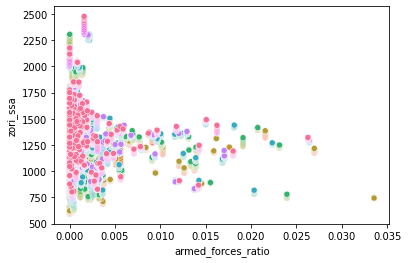

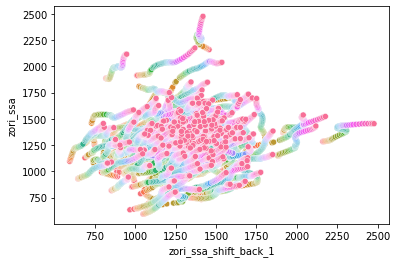

In [33]:
for i in df.columns:
    plt.figure()
    sns.scatterplot(data=df, x=i, y='zori_ssa', hue='Time', legend=False)

In [35]:
# final dataframe
df = df.merge(zips, how='left', on='zip_code')
df = gpd.GeoDataFrame(df)

In [36]:
type(df)

geopandas.geodataframe.GeoDataFrame

### Visual Exploration

In [ ]:
# limit to most recent
dft = df[df['Time']=='2018-12-01 00:00:00']

In [ ]:
type(dft)

In [ ]:
# limit to Houston
houston = dft[dft['zip_code'].isin(houston_zip)]

In [ ]:
type(houston)

In [ ]:
fig,ax = plt.subplots(figsize=(15,15))
houston.plot(ax=ax, zorder=2, legend=True, linewidth=0.05, column='median_age');

### begin prelim modeling 

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [44]:
data = df.copy()

In [45]:
data = data.dropna()

In [46]:
data.Time.unique()

array(['2014-01-01T00:00:00.000000000', '2014-02-01T00:00:00.000000000',
       '2014-03-01T00:00:00.000000000', '2014-04-01T00:00:00.000000000',
       '2014-05-01T00:00:00.000000000', '2014-06-01T00:00:00.000000000',
       '2014-07-01T00:00:00.000000000', '2014-08-01T00:00:00.000000000',
       '2014-09-01T00:00:00.000000000', '2014-10-01T00:00:00.000000000',
       '2014-11-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000',
       '2015-01-01T00:00:00.000000000', '2015-02-01T00:00:00.000000000',
       '2015-03-01T00:00:00.000000000', '2015-04-01T00:00:00.000000000',
       '2015-05-01T00:00:00.000000000', '2015-06-01T00:00:00.000000000',
       '2015-07-01T00:00:00.000000000', '2015-08-01T00:00:00.000000000',
       '2015-09-01T00:00:00.000000000', '2015-10-01T00:00:00.000000000',
       '2015-11-01T00:00:00.000000000', '2015-12-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000', '2016-02-01T00:00:00.000000000',
       '2016-03-01T00:00:00.000000000', '2016-04-01

In [47]:
data.loc[:,'Date'] = data.loc[:,'Time'].apply(lambda x: str(x)[:-9])

data = data.set_index('Date')

train = data.loc['2014-12-01':'2018-05-01',:]
test = data.loc['2018-06-01':,:]

In [48]:
print(train.shape)
print(test.shape)

(8391, 78)
(1484, 78)


In [50]:
train = train.reset_index().drop(['Date','Time','State','City','zip_code', 'zori_ssa_diff', 'zori_ssa_shift_back_1'],axis = 1)
test = test.reset_index().drop(['Date','Time','State','City','zip_code', 'zori_ssa_diff', 'zori_ssa_shift_back_1'],axis = 1)


In [52]:
# train['INTPTLAT10'] = train['INTPTLAT10'].astype(float)
# train['INTPTLON10'] = train['INTPTLON10'].astype(float)
# train['ZCTA5CE10'] = train['ZCTA5CE10'].astype(float)

In [90]:
train = train[['zori_ssa', 'poverty', 'median_income',
       'gini_index', 'housing_units',
       'renter_occupied_housing_units_paying_cash_median_gross_rent',
       'occupied_housing_units', 'vacant_housing_units_for_rent',
       'median_year_structure_built', 'married_households',
       'households_public_asst_or_food_stamps', 'male_male_households',
       'female_female_households', 'children', 'median_rent',
       'percent_income_spent_on_rent', 'owner_occupied_housing_units',
       'aggregate_travel_time_to_work', 'commuters_by_public_transportation',
       'high_school_diploma', 'bachelors_degree', 'employed_pop',
       'unemployed_pop', 'pop_in_labor_force', 'armed_forces', 'year',
       'total_pop', 'male_pop_ratio', 'female_pop_ratio', 'white_pop_ratio',
       'not_us_citizen_pop_ratio', 'black_pop_ratio', 'asian_pop_ratio',
       'hispanic_pop_ratio', 'amerindian_pop_ratio', 'other_race_pop_ratio',
       'pop_determined_poverty_status_ratio', 'children_ratio',
       'employed_pop_ratio', 'unemployed_pop_ratio',
       'pop_in_labor_force_ratio', 'armed_forces_ratio']]

test = test[['zori_ssa', 'poverty', 'median_income',
       'gini_index', 'housing_units',
       'renter_occupied_housing_units_paying_cash_median_gross_rent',
       'occupied_housing_units', 'vacant_housing_units_for_rent',
       'median_year_structure_built', 'married_households',
       'households_public_asst_or_food_stamps', 'male_male_households',
       'female_female_households', 'children', 'median_rent',
       'percent_income_spent_on_rent', 'owner_occupied_housing_units',
       'aggregate_travel_time_to_work', 'commuters_by_public_transportation',
       'high_school_diploma', 'bachelors_degree', 'employed_pop',
       'unemployed_pop', 'pop_in_labor_force', 'armed_forces', 'year',
       'total_pop', 'male_pop_ratio', 'female_pop_ratio', 'white_pop_ratio',
       'not_us_citizen_pop_ratio', 'black_pop_ratio', 'asian_pop_ratio',
       'hispanic_pop_ratio', 'amerindian_pop_ratio', 'other_race_pop_ratio',
       'pop_determined_poverty_status_ratio', 'children_ratio',
       'employed_pop_ratio', 'unemployed_pop_ratio',
       'pop_in_labor_force_ratio', 'armed_forces_ratio']]

In [94]:
import time

X_train = train.drop(['zori_ssa'],axis = 1)
# X_train = train[['zori_ssa_shift_back_6','delta_zori_ssa_shift_back_6',
#                  'delta_zori_ssa_6_shift_back_6','delta_zori_ssa_12_shift_back_6',
#                  'delta_zori_ssa_6_shift_back_1']]
X_test = test.drop(['zori_ssa'],axis = 1)
# X_test = test[['zori_ssa_shift_back_6','delta_zori_ssa_shift_back_6',
#                'delta_zori_ssa_6_shift_back_6','delta_zori_ssa_12_shift_back_6',
#               'delta_zori_ssa_6_shift_back_1']]
y_train = train['zori_ssa']
y_test = test['zori_ssa']

In [95]:
X_test.dtypes

poverty                                                        float64
median_income                                                  float64
gini_index                                                     float64
housing_units                                                  float64
renter_occupied_housing_units_paying_cash_median_gross_rent    float64
occupied_housing_units                                         float64
vacant_housing_units_for_rent                                  float64
median_year_structure_built                                    float64
married_households                                             float64
households_public_asst_or_food_stamps                          float64
male_male_households                                           float64
female_female_households                                       float64
children                                                       float64
median_rent                                                    float64
percen

In [96]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(X_train,y_train)
print(ols.score(X_train,y_train))
print(ols.coef_) 

0.6288793942133651
[-4.27364109e-04  1.41889579e-03  5.45476530e+02 -7.53099601e-03
  4.14211829e-01  7.17918903e-03 -1.34261645e-01 -1.83141007e+00
 -3.84933069e-02  2.56902742e-02 -2.69093326e-01 -8.61315030e-02
  1.10304887e-02 -3.36624536e-02  1.48729502e+00  2.76237262e-02
 -1.26127653e-04 -2.34945885e-02 -3.84347934e-03 -1.61364255e-11
 -1.31788125e-02 -3.19009440e-02  3.99044684e-03  4.90700635e-02
  2.02509386e+01  5.01221017e-03  4.31904161e+02 -4.31904161e+02
  9.14404371e+02  9.58363404e+02  9.09141670e+02  4.27296860e+02
  4.08990701e+02 -8.94085939e+02 -1.72748861e+03 -2.03902648e+03
  1.00576417e+03  1.30322588e+03  1.19349390e+02  7.23505799e+02
 -6.99069467e+02]


In [97]:
# importing necessary libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score

<AxesSubplot:>

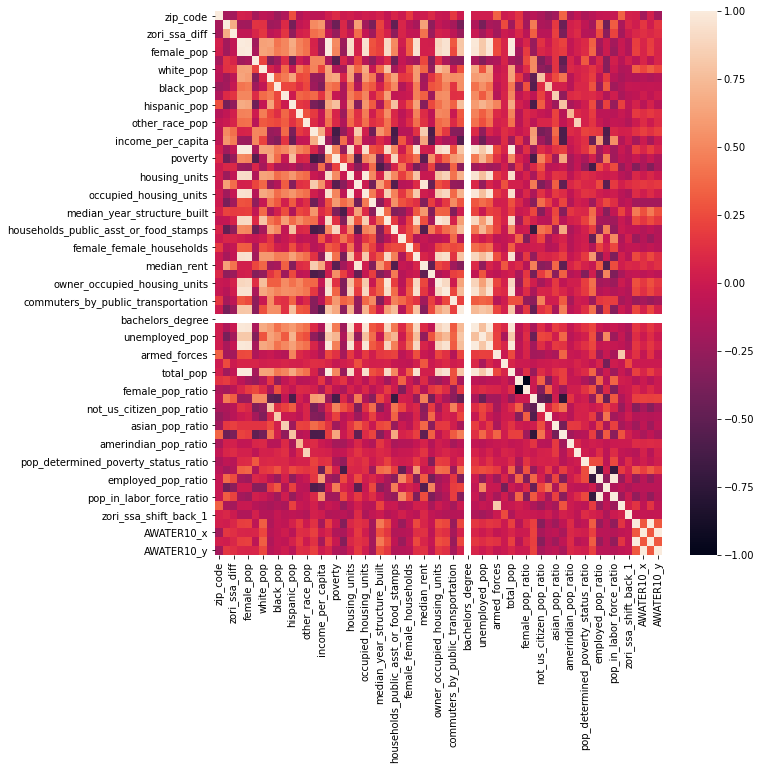

In [98]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr())

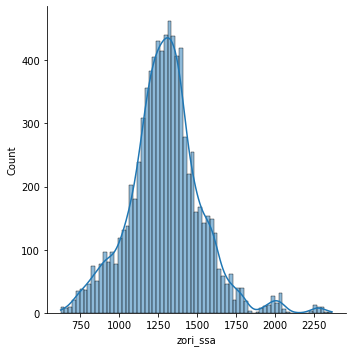

In [99]:
sns.displot(y_train, kde=True);

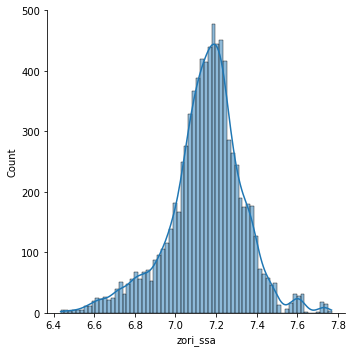

In [100]:
sns.displot(np.log(y_train), kde=True);

In [101]:
y_train = np.log(y_train)
y_test = np.log(y_test)

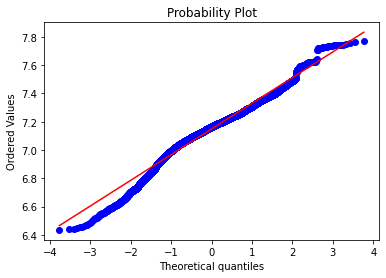

In [102]:
stats.probplot(y_train, plot=plt);

In [103]:
X_train.columns

Index(['poverty', 'median_income', 'gini_index', 'housing_units',
       'renter_occupied_housing_units_paying_cash_median_gross_rent',
       'occupied_housing_units', 'vacant_housing_units_for_rent',
       'median_year_structure_built', 'married_households',
       'households_public_asst_or_food_stamps', 'male_male_households',
       'female_female_households', 'children', 'median_rent',
       'percent_income_spent_on_rent', 'owner_occupied_housing_units',
       'aggregate_travel_time_to_work', 'commuters_by_public_transportation',
       'high_school_diploma', 'bachelors_degree', 'employed_pop',
       'unemployed_pop', 'pop_in_labor_force', 'armed_forces', 'year',
       'total_pop', 'male_pop_ratio', 'female_pop_ratio', 'white_pop_ratio',
       'not_us_citizen_pop_ratio', 'black_pop_ratio', 'asian_pop_ratio',
       'hispanic_pop_ratio', 'amerindian_pop_ratio', 'other_race_pop_ratio',
       'pop_determined_poverty_status_ratio', 'children_ratio',
       'employed_pop_ratio'

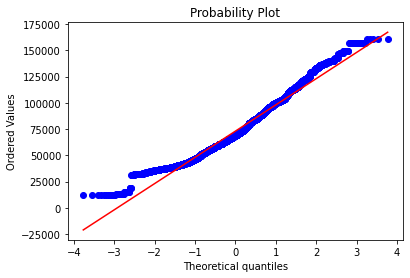

In [104]:
stats.probplot(X_train['median_income'], plot=plt);

In [105]:
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

In [106]:
def ridge_coefs(X, y, alphas):
    
    # list of coefficients:
    coefs = []
    
    # initiate the model
    ridge_reg = Ridge()
    
    # iterate through the alphas fed into the function:
    for a in alphas:
        
        # reinitiate with the new alpha:
        ridge_reg.set_params(alpha=a)
        
        # refit the model on the provided X, y
        ridge_reg.fit(X, y)
        
        # print the coefficient list
        coefs.append(ridge_reg.coef_)
        
    return coefs
  # this snippet is taken from an online source

In [107]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train), columns=X_train.columns)

In [108]:
# np.logspace gives us points between specified orders of magnitude on a logarithmic scale. It is base 10.
r_alphas = np.logspace(0, 5, 200)

# Get the coefficients for each alpha for the Ridge, using the function above
r_coefs = ridge_coefs(Z_train, y_train, r_alphas)

In [109]:
from cycler import cycler

def coef_plotter(alphas, coefs, feature_names, to_alpha, regtype='ridge'):
    
    # Get the full range of alphas before subsetting to keep the plots from 
    # resetting axes each time. (We use these values to set static axes later).
    amin = np.min(alphas)
    amax = np.max(alphas)
    
    # Subset the alphas and coefficients to just the ones below the set limit
    # from the interactive widget:
    alphas = [a for a in alphas if a <= to_alpha]
    coefs = coefs[0:len(alphas)]
    
    # Get some colors from seaborn:
    colors = sns.color_palette("husl", len(coefs[0]))
    
    # Get the figure and reset the size to be wider:
    fig = plt.figure()
    fig.set_size_inches(18,5)

    # We have two axes this time on our figure. 
    # The fig.add_subplot adds axes to our figure. The number inside stands for:
    #[figure_rows|figure_cols|position_of_current_axes]
    ax1 = fig.add_subplot(121)
    
    # Give it the color cycler:
    ax1.set_prop_cycle(cycler('color', colors))
    
    # Print a vertical line showing our current alpha threshold:
    ax1.axvline(to_alpha, lw=2, ls='dashed', c='k', alpha=0.4)
    
    # Plot the lines of the alphas on x-axis and coefficients on y-axis
    ax1.plot(alphas, coefs, lw=2)
    
    # set labels for axes:
    ax1.set_xlabel('alpha', fontsize=20)
    ax1.set_ylabel('coefficients', fontsize=20)
    
    # If this is for the ridge, set this to a log scale on the x-axis:
    if regtype == 'ridge':
        ax1.set_xscale('log')
    
    # Enforce the axis limits:
    ax1.set_xlim([amin, amax])
    
    # Put a title on the axis
    ax1.set_title(regtype+' coefficients\n', fontsize=20)
    
    # Get the ymin and ymax for this axis to enforce it to be the same on the 
    # second chart:
    ymin, ymax = ax1.get_ylim()

    # Add our second axes for the barplot in position 2:
    ax2 = fig.add_subplot(122)
    
    # Position the bars according to their index from the feature names variable:
    ax2.bar(list(range(1, len(feature_names)+1)), coefs[-1], align='center', color=colors)
    ax2.set_xticks(list(range(1, len(feature_names)+1)))
    
    # Reset the ticks from numbers to acutally be the names:
    ax2.set_xticklabels(feature_names, rotation=65, fontsize=12)
    
    # enforce limits and add titles, labels
    ax2.set_ylim([ymin, ymax])
    ax2.set_title(regtype+' predictor coefficients\n', fontsize=20)
    ax2.set_xlabel('coefficients', fontsize=20)
    ax2.set_ylabel('alpha', fontsize=20)
    
    plt.show()
  # this snippet is taken from an online source

In [110]:
from ipywidgets import *
from IPython.display import display

def ridge_plot_runner(log_of_alpha=0):
    coef_plotter(r_alphas, r_coefs, Z_train.columns, 10**log_of_alpha, regtype='ridge')

interact(ridge_plot_runner, log_of_alpha=(0.1,5,0.2))
print("this snippet is taken from an online source")

interactive(children=(FloatSlider(value=0.1, description='log_of_alpha', max=5.0, min=0.1, step=0.2), Output()…

this snippet is taken from an online source


In [111]:
# Set up a list of ridge alphas to check.
r_alphas = np.logspace(0, 5, 100)
# Generates 200 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.

# Cross-validate over our list of ridge alphas.
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')

# Fit model using best ridge alpha!
ridge_model = ridge_model.fit(Z_train, y_train)

In [112]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

1.0

In [113]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

In [114]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)

# Evaluate model.
print(r2_score(y_test, ridge_opt_preds))
print(r2_score(y_train, ridge_opt_preds_train))

0.5716626909211602
0.6250329976647149


In [129]:
r_coefs

[array([-0.00857217,  0.01523278,  0.02556289, -0.09876276,  0.07130105,
         0.10275013, -0.0501248 , -0.0151851 , -0.15518599,  0.00736135,
        -0.00719282, -0.00138294,  0.0361374 , -0.00881453,  0.00247653,
         0.11838682, -0.02767399, -0.00638081, -0.01164781,  0.        ,
        -0.03757028, -0.00326665, -0.03546747,  0.01227059,  0.01996645,
         0.10532038,  0.00596958, -0.00596958,  0.13284324,  0.06103514,
         0.07770359,  0.01821383,  0.04303308, -0.00260417, -0.00217681,
        -0.05123881,  0.05982359,  0.04956111, -0.00488353,  0.05065055,
        -0.0061    ]),
 array([-0.00851403,  0.01524232,  0.02555295, -0.09802045,  0.07125366,
         0.10194275, -0.05016417, -0.01517843, -0.15485928,  0.00737391,
        -0.00718704, -0.00137688,  0.03627038, -0.00876366,  0.00248511,
         0.11831269, -0.02767803, -0.00637578, -0.0116234 ,  0.        ,
        -0.03734609, -0.00320388, -0.03525131,  0.01229701,  0.01996164,
         0.10450509,  0.0059

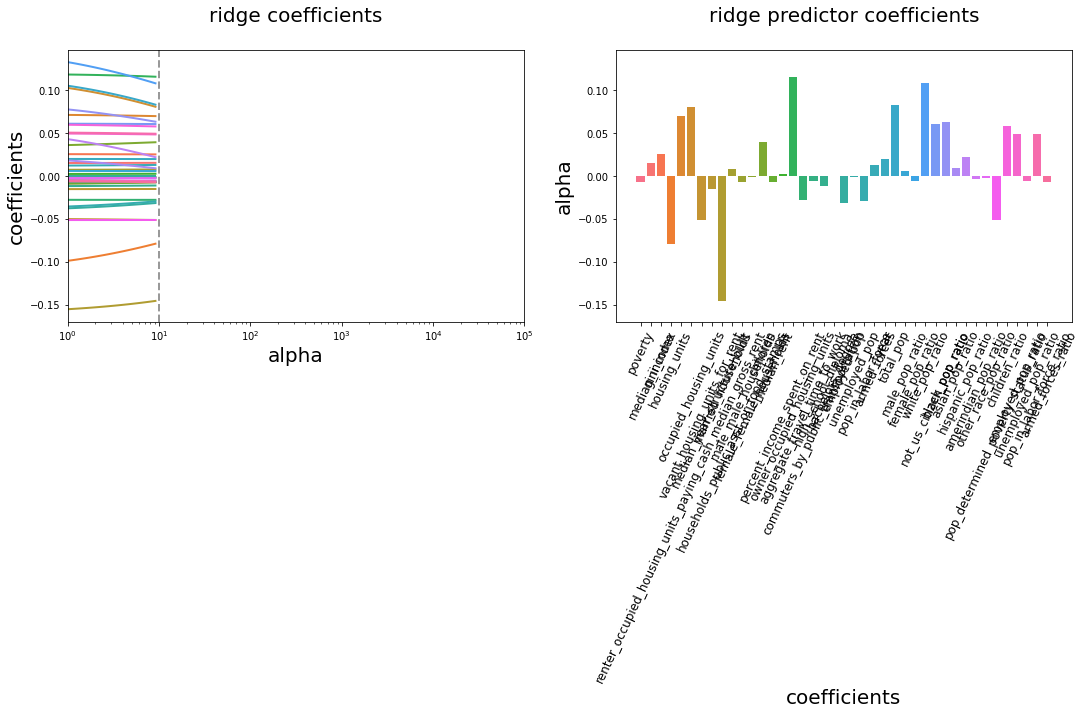

In [115]:
coef_plotter(r_alphas, r_coefs, Z_train.columns, 10**1, regtype='ridge')

In [134]:
ridge_model(alpha=1)

TypeError: 'RidgeCV' object is not callable

In [116]:

# evaluate an ridge regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge

# define model
model = Ridge(alpha=1.0)

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# force scores to be positive
scores = absolute(scores)


In [117]:
from numpy import arange


# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.087
Config: {'alpha': 0.07}


/Users/trevorban/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.30733e-17): result may not be accurate.
  overwrite_a=True).T


In [119]:
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(Z_train, y_train)

In [120]:
scores = cross_val_score(model, Z_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [126]:
ridge_model.score

<bound method RegressorMixin.score of RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring='r2', store_cv_values=False)>

In [ ]:
print("Best Parameters: ",ridge_model.get_params,"\n\n",
      "Mean cross-validated score of the best_estimator: ",ridge_model.score,"\n")

best_forest = grid_search_forest.best_estimator_
feature_importance = [i for i in zip(X_train.columns,best_forest.feature_importances_)]
feature_importance = sorted(feature_importance,key = lambda x: x[1],reverse = True)

FI = pd.DataFrame(feature_importance,columns = ['feature','importance'])

fig = px.bar(data_frame = FI.iloc[:,:],
             x = 'feature',
             y = 'importance',
             title = "Feature Importance",
             color = 'importance',
            height = 800,width = 2000)
fig.show()

In [127]:
print("Best Parameters: ",ridge_model.get_params,"\n\n",
      "Mean cross-validated score of the best_estimator: ",ridge_model.score,"\n")


Best Parameters:  <bound method BaseEstimator.get_params of RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring='r2', store_cv_values=False)> 

 Mean cross-validated score of the best_estimator:  <bou

In [137]:
ridge_model = RidgeCV(alphas=[1], scoring='r2')

# Fit model using best ridge alpha!
ridge_model = ridge_model.fit(Z_train, y_train)

In [141]:
ridge_model

RidgeCV(alphas=array([1]), cv=None, fit_intercept=True, gcv_mode=None,
        normalize=False, scoring='r2', store_cv_values=False)